# Detector calibration and Integration of 2D powder diffraction patterns

## Detector calibration

In this notebook, we show how to calibrate a 2D area detector and perform the integration of 2D powder diffraction patterns.

The python library 'pyFAI' is used for this tutorial.

A more detailed tutorial can be found here: https://pyfai.readthedocs.io/en/master/usage/cookbook/calib-gui/index.html 

First, we need to open an anaconda prompt terminal and load the finden_course anaconda environment. 
Next, we load the pyFAI-calib2 graphical user inteface (GUI).

![title](../static/pyfai_calib_0.png)

The pyFAI-calib2 GUI should load after a few seconds:

![title](../_static/pyfai_calib_1.png)

Next we set the X-ray energy (71 keV in this experiment) and select the calibrant (CeO2 in this experiment)

![title](../_static/pyfai_calib_2.png)

Next we select the detector, the Dectris Pilatus 2M was used in this experiment. One can also define a new detector by setting the image size and pixel size

![title](../_static/pyfai_calib_3.png)

After selecting the detector, we need to check that the correct information has been used

![title](../_static/pyfai_calib_4.png)

Next we need to pass the calibrant image

![title](../_static/pyfai_calib_5.png)

Next we load the CeO2.cbf file which is located in the examples/xrd2d directory

![title](../_static/pyfai_calib_6.png)

The updated setting can be seen in the following figure

![title](../_static/pyfai_calib_7.png)

Next we have to create the detector mask in order to mask out the regios of the image where there are no detector elements (modules), dead/sick pixels in the detector as well as the area corresponding to the beamstop

![title](../_static/pyfai_calib_8.png)

We can use a polygon to mask out the beamstop

![title](../_static/pyfai_calib_9.png)

The updated mask is shown in the following figure

![title](../_static/pyfai_calib_10.png)

Also we can use a square to mask some dead/sick pixels in the detector as shown in the figure below

![title](../_static/pyfai_calib_11.png)

Next we perfom the peak picking. Here we interactively select points in multiple CeO2 rings as shown in the figure below.

![title](../_static/pyfai_calib_12.png)

The minimisation is performed and the sample-to-detector distance is calculated along with the beam centre position and the three detector tilts

![title](../_static/pyfai_calib_13.png)

Finally, we perform the azimuthal integration. In the following figure, one can also see the polar transformed (also known as "caked") 2D powder diffraction pattern.

![title](../_static/pyfai_calib_14.png)

Finally we export the .poni file that contains all the required information regarding the experiment and the detector. This information can be used by pyFAI to perform the integration of 2D diffraction patterns to 1D.

We can now perform a test using pyFAI to integrate the 2D diffraction pattern using python. First, we import the required modules

In [1]:
import pyFAI, fabio
import numpy as np
import matplotlib.pyplot as plt

Next we set the path to where the data are located

In [2]:

p = '../../../examples/xrd2d/'


Now we can read the .poni calibration file as well as the .cbf file

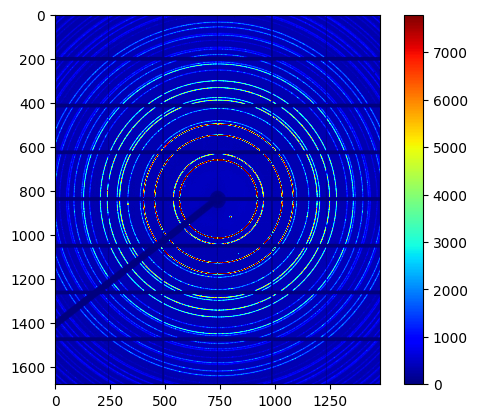

In [3]:
poni = "%sCeO2.poni" %p
ai = pyFAI.load(poni)

fn = '%sCeO2.cbf' %p

im = fabio.open(fn)
im = np.array(im.data)

plt.figure(1);plt.clf()
plt.imshow(im, cmap ='jet')
plt.colorbar()
plt.clim(0, 3*np.std(im))
plt.show()

We should also read the mask

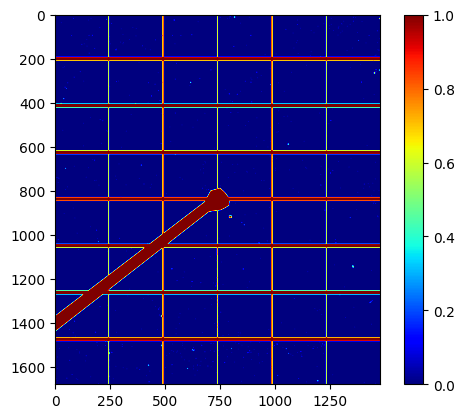

In [4]:
msk = fabio.open('%smask.edf' %p)
msk = np.array(msk.data)

plt.figure(1);plt.clf()
plt.imshow(msk, cmap ='jet')
plt.colorbar()
plt.show()

Finally we perform the azimuthal integration. We set the number of bins in the integrated data to be 1024, the x axis unit to be 2theta in degrees. We also pass the detector mask so that the problematic pixels are ignored during integration. Using a small number for the number of bins will lead to low resolution while using a large number will lead to arteficial peak splitting.
As a rule of thumb one should use as a maximum number the diagonal from the beam centre times 2.

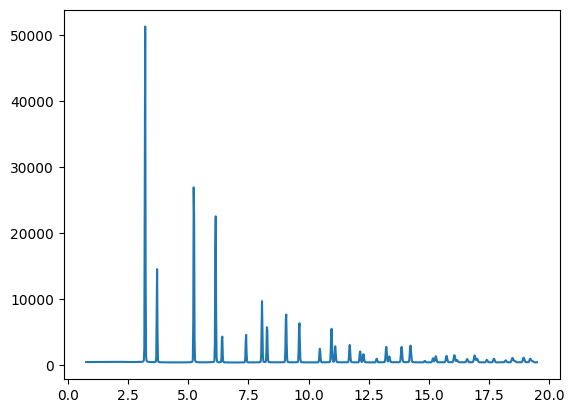

In [5]:
npt_rad = 1024

tth, I = ai.integrate1d(data = im, npt=npt_rad, unit="2th_deg", mask = msk)

plt.figure(2);plt.clf()
plt.plot(tth,I)
plt.show()